In [1]:
import matplotlib.pyplot as plt
import numpy as np
tartanvo_est_path = "results/experiments/kitti_tartanvo_1914_original.txt"
tartanvo_rain_path = "results/experiments/kitti_tartanvo_1914_rain.txt"
tartanvo_de_rain_path = "results/experiments/kitti_tartanvo_1914_rain_removed.txt"

dfvo_est_path = "/home/ntsai/repos/DF-VO/result/kitti_10/10.txt"
dfvo_rain_path = "/home/ntsai/repos/DF-VO/result/kitti_10_rain/10_rain.txt"
dfvo_de_rain_path = "/home/ntsai/repos/DF-VO/result/kitti_10_rain_removed/10_rain_removed.txt"
gt_path = "data/KITTI_10/10.txt"

In [2]:
def plot_traj(gtposes, estposes, labels, vis=False, savefigname=None, title="Trajectory", scale=False):
    fig = plt.figure(figsize=(4,4))
    cm = plt.cm.get_cmap('Spectral')

    plt.subplot(111)
    plt.plot(gtposes[:, 0],gtposes[:, 1], linestyle='dashed',c='k', label="Ground Truth")
    for estpose, label in zip(estposes, labels):
        plt.plot(estpose[:, 0], estpose[:, 1], label=label, alpha=0.8)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend()
    plt.title(title)
    # Set correct scale
    if scale:
        plt.axis('scaled')
    if savefigname is not None:
        plt.savefig(savefigname, bbox_inches='tight', dpi=300)
    if vis:
        plt.show()
    plt.close(fig)

In [3]:
from transform_format import transform

tartanvo_est = np.loadtxt(tartanvo_est_path)
tartanvo_rain_est = np.loadtxt(tartanvo_rain_path)
tartanvo_de_rain_est = np.loadtxt(tartanvo_de_rain_path)

gt = np.loadtxt(gt_path)
gt = transform(gt, "kitti", "tartan")

dfvo_est = np.loadtxt(dfvo_est_path)
dfvo_est = transform(dfvo_est, "df", "tartan")
dfvo_rain_est = np.loadtxt(dfvo_rain_path)
dfvo_rain_est = transform(dfvo_rain_est, "df", "tartan")
dfvo_de_rain_est = np.loadtxt(dfvo_de_rain_path)
dfvo_de_rain_est = transform(dfvo_de_rain_est, "df", "tartan")

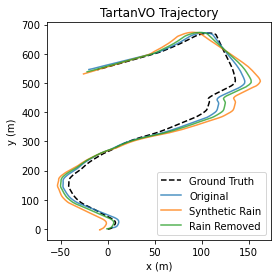

In [13]:
plot_traj(gt, [tartanvo_est, tartanvo_rain_est, tartanvo_de_rain_est], ["Original", "Synthetic Rain", "Rain Removed"], True, savefigname="results/images/tartanvo_trajectory.png", title="TartanVO Trajectory")

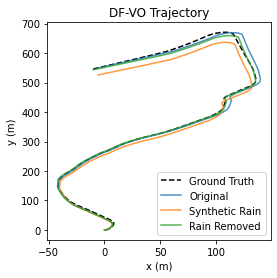

In [9]:
plot_traj(gt, [dfvo_est, dfvo_rain_est, dfvo_de_rain_est], ["Original", "Synthetic Rain", "Rain Removed"], True, savefigname="results/images/dfvo_trajectory.png", title="DF-VO Trajectory")

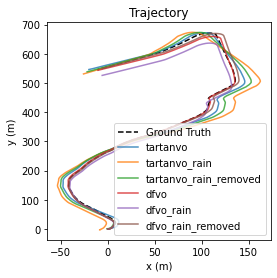

In [10]:
plot_traj(gt, [tartanvo_est, tartanvo_rain_est, tartanvo_de_rain_est, dfvo_de_rain_est, dfvo_rain_est, dfvo_est], ["tartanvo", "tartanvo_rain", "tartanvo_rain_removed", "dfvo", "dfvo_rain", "dfvo_rain_removed"], True, savefigname="results/images/all_trajectory.png")

In [ ]:
from evaluator.tartanair_evaluator import TartanAirEvaluator

for est_poses, name in zip([tartanvo_est, tartanvo_rain_est, tartanvo_de_rain_est, dfvo_est, dfvo_rain_est, dfvo_de_rain_est], ["tartanvo", "tartanvo_rain", "tartanvo_rain_removed", "dfvo", "dfvo_rain", "dfvo_rain_removed"]):
    print(name)
    evaluator = TartanAirEvaluator()
    results = evaluator.evaluate_one_trajectory(gt, est_poses, scale=False, kittitype=True)
    print("==> ATE: %.4f,\t KITTI-R/t: %.4f, %.4f" %(results['ate_score'], results['kitti_score'][0], results['kitti_score'][1]))

In [46]:
# Soul City
tartanvo_rain_path = "results/experiments/tartanair_soulcity_P000.txt"
tartanvo_de_rain_path = "results/experiments/tartanair_soulcity_P000_derained.txt"

dfvo_rain_path = "/home/ntsai/repos/repo/CMU_16-833_SLAM_Final/DF-VO/result/soulcity_P000/soulcity_P000.txt"
dfvo_de_rain_path = "/home/ntsai/repos/repo/CMU_16-833_SLAM_Final/DF-VO/result/soulcity_P000_derained/soulcity_P000_derained.txt"
gt_path = "/data/datasets/ntsai/vo/tartanair/soulcity/soulcity/Easy/P000/pose_left.txt"

In [49]:
from transform_format import transform

tartanvo_rain_est = np.loadtxt(tartanvo_rain_path)
tartanvo_de_rain_est = np.loadtxt(tartanvo_de_rain_path)

gt = np.loadtxt(gt_path)

dfvo_rain_est = np.loadtxt(dfvo_rain_path)
dfvo_rain_est = transform(dfvo_rain_est, "df", "tartan")
dfvo_de_rain_est = np.loadtxt(dfvo_de_rain_path)
dfvo_de_rain_est = transform(dfvo_de_rain_est, "df", "tartan")

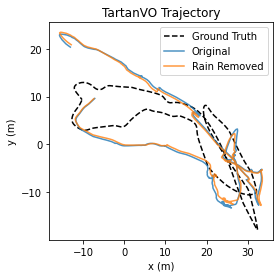

In [50]:
plot_traj(gt, [tartanvo_rain_est, tartanvo_de_rain_est], ["Original", "Rain Removed"], True, savefigname="results/images/soulcity_P000_tartanvo_trajectory.png", title="TartanVO Trajectory")

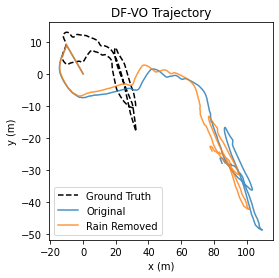

In [51]:
plot_traj(gt, [dfvo_rain_est, dfvo_de_rain_est], ["Original", "Rain Removed"], True, savefigname="results/images/soulcity_P000_dfvo_trajectory.png", title="DF-VO Trajectory")

In [21]:
from evaluator.tartanair_evaluator import TartanAirEvaluator

for est_poses, name in zip([tartanvo_rain_est, tartanvo_de_rain_est, dfvo_rain_est, dfvo_de_rain_est], ["tartanvo_rain", "tartanvo_rain_removed", "dfvo_rain", "dfvo_rain_removed"]):
    print(name)
    evaluator = TartanAirEvaluator()
    results = evaluator.evaluate_one_trajectory(gt, est_poses, scale=False, kittitype=True)
    print("==> ATE: %.4f,\t KITTI-R/t: %.4f, %.4f" %(results['ate_score'], results['kitti_score'][0], results['kitti_score'][1]))

tartanvo_rain
  ATE scale: 1.0
==> ATE: 6.7121,	 KITTI-R/t: 0.5100, 0.2430
tartanvo_rain_removed
  ATE scale: 1.0
==> ATE: 7.0368,	 KITTI-R/t: 0.5385, 0.2440
dfvo_rain
  ATE scale: 1.0
==> ATE: 27.8092,	 KITTI-R/t: 0.2159, 0.4323
dfvo_rain_removed
  ATE scale: 1.0
==> ATE: 26.5172,	 KITTI-R/t: 0.2523, 0.4205


In [22]:
# End Of World
tartanvo_rain_path = "results/experiments/tartanair_endofworld_P000.txt"
tartanvo_de_rain_path = "results/experiments/tartanair_endofworld_P000_dehazed_sample.txt"

dfvo_rain_path = "/home/ntsai/repos/repo/CMU_16-833_SLAM_Final/DF-VO/result/endofworld_P000/endofworld_P000.txt"
dfvo_de_rain_path = "/home/ntsai/repos/repo/CMU_16-833_SLAM_Final/DF-VO/result/endofworld_P000_dehazed_sample/endofworld_P000_dehazed_sample.txt"
gt_path = "/data/datasets/ntsai/vo/tartanair/endofworld/endofworld/Easy/P000/pose_left.txt"

In [19]:
from transform_format import transform

tartanvo_rain_est = np.loadtxt(tartanvo_rain_path)
tartanvo_de_rain_est = np.loadtxt(tartanvo_de_rain_path)

gt = np.loadtxt(gt_path)

dfvo_rain_est = np.loadtxt(dfvo_rain_path)
dfvo_rain_est = transform(dfvo_rain_est, "df", "tartan")
dfvo_de_rain_est = np.loadtxt(dfvo_de_rain_path)
dfvo_de_rain_est = transform(dfvo_de_rain_est, "df", "tartan")

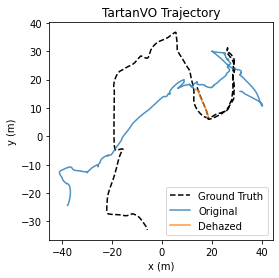

In [20]:
plot_traj(gt, [tartanvo_rain_est, tartanvo_de_rain_est], ["Original", "Dehazed"], True, savefigname="results/images/endofworld_P000_dehazed_sample_tartanvo_trajectory.png", title="TartanVO Trajectory")

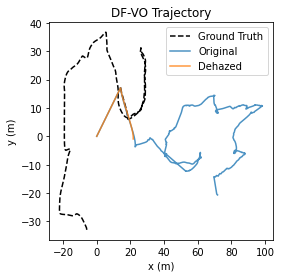

In [21]:
plot_traj(gt, [dfvo_rain_est, dfvo_de_rain_est], ["Original", "Dehazed"], True, savefigname="results/images/endofworld_P000_dehazed_sample_dfvo_trajectory.png", title="DF-VO Trajectory")

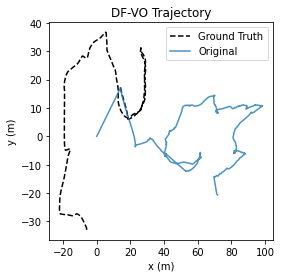

In [11]:
plot_traj(gt, [dfvo_rain_est], ["Original"], True, title="DF-VO Trajectory")

In [33]:
from evaluator.tartanair_evaluator import TartanAirEvaluator


for est_poses, name in zip([tartanvo_rain_est, dfvo_rain_est], ["tartanvo_rain", "dfvo_rain"]):
    print(name)
    evaluator = TartanAirEvaluator()
    results = evaluator.evaluate_one_trajectory(gt, est_poses, scale=False, kittitype=True)
    print("==> ATE: %.4f,\t KITTI-R/t: %.4f, %.4f" %(results['ate_score'], results['kitti_score'][0], results['kitti_score'][1]))

tartanvo_rain
  ATE scale: 1.0
==> ATE: 14.4409,	 KITTI-R/t: 0.8626, 0.4985
dfvo_rain
  ATE scale: 1.0
==> ATE: 23.0988,	 KITTI-R/t: 0.8170, 0.6814


In [22]:
# Radiate
gt_path = "/home/ntsai/repos/repo/CMU_16-833_SLAM_Final/RADIATE/city_1_0.txt"

In [25]:
from transform_format import transform

gt = np.loadtxt(gt_path)
gt = transform(gt, "kitti", "tartan")

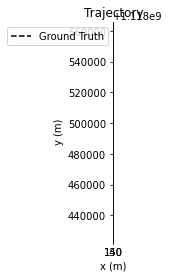

In [31]:
plot_traj(gt, [], [], True)